In [5]:
lg = function(mu, n, ybar){
    mu2 = mu^2
    n * (ybar *mu - mu2 / 2.0) - log(1 + mu2)
 }

In [6]:
#metropolis_hstings alg

mh = function(n, ybar, n_iter, mu_init, cand_sd) {
    
    mu_out = numeric(n_iter)
    accpt = 0
    mu_now = mu_init
    lg_now = lg(mu = mu_now, n = n, ybar = ybar)
    
    for (i in 1:n_iter) {
        
        mu_cand = rnorm(1, mean = mu_now, sd = cand_sd)
        
        lg_cand = lg(mu = mu_cand, n = n, ybar = ybar)
        
        lalpha = lg_cand - lg_now
        alpha = exp(lalpha)
        
        
        u = runif(1)
        
        if (u < alpha) { # accept the candidate
            mu_now = mu_cand
            accpt = accpt + 1
            lg_now = lg_cand
        }
        
        mu_out[i] = mu_cand
    }
    
    list(mu=mu_out, accpt=accpt/n_iter)    
}

In [8]:
y = c(-0.2, -1.5, -5.3, 0.3, -0.8, -2.2)
ybar = mean(y)
n = length(y)

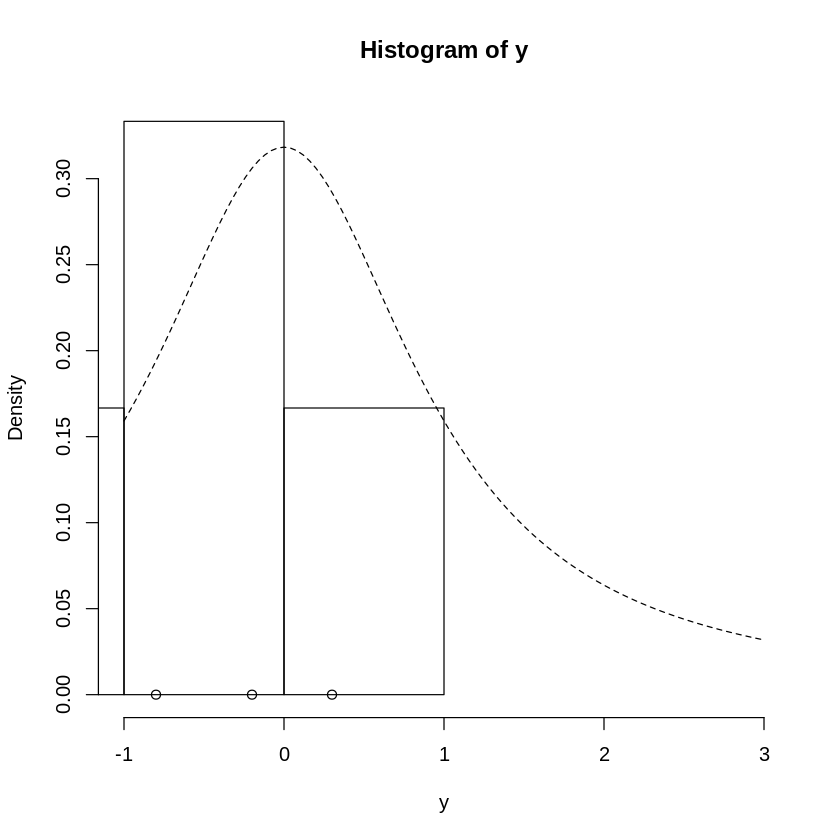

In [9]:
n = length(y)
hist(y, freq=FALSE, xlim=c(-1.0, 3.0)) # histogram of the data
curve(dt(x=x, df=1), lty=2, add=TRUE) # prior for mu
points(y, rep(0,n), pch=1) # individual data points
points(ybar, 0, pch=19) # sample mean

In [12]:
set.seed(43) # set the random seed for reproducibility
post = mh(n=n, ybar=ybar, n_iter=5e3, mu_init=0.0, cand_sd=3.0)
str(post)

List of 2
 $ mu   : num [1:5000] -0.113 1.507 1.283 3.299 1.047 ...
 $ accpt: num 0.166


In [16]:
ds = c(0.5, 1.5, 3.0, 4.0)

In [18]:
for (sd in ds) {
    post = mh(n=n, ybar=ybar, n_iter=5e3, mu_init=0.0, cand_sd=sd)
    print(sd)
    print (post$accpt)
}

[1] 0.5
[1] 0.6584
[1] 1.5
[1] 0.326
[1] 3
[1] 0.1838
[1] 4
[1] 0.1256


In [23]:
post = mh(n=n, ybar=ybar, n_iter=100e3, mu_init=0.0, cand_sd=1.5)

In [24]:
summary(as.mcmc(post$mu))


Iterations = 1:1e+05
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     -1.464086       1.550559       0.004903       0.006008 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
-4.4916 -2.5148 -1.4734 -0.4167  1.5773 


In [20]:
install.packages("coda")
library("coda")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


List of 2
 $ mu   : num [1:1000] -1.4162 -0.0668 -0.3416 2.5421 0.4934 ...
 $ accpt: num 0.106


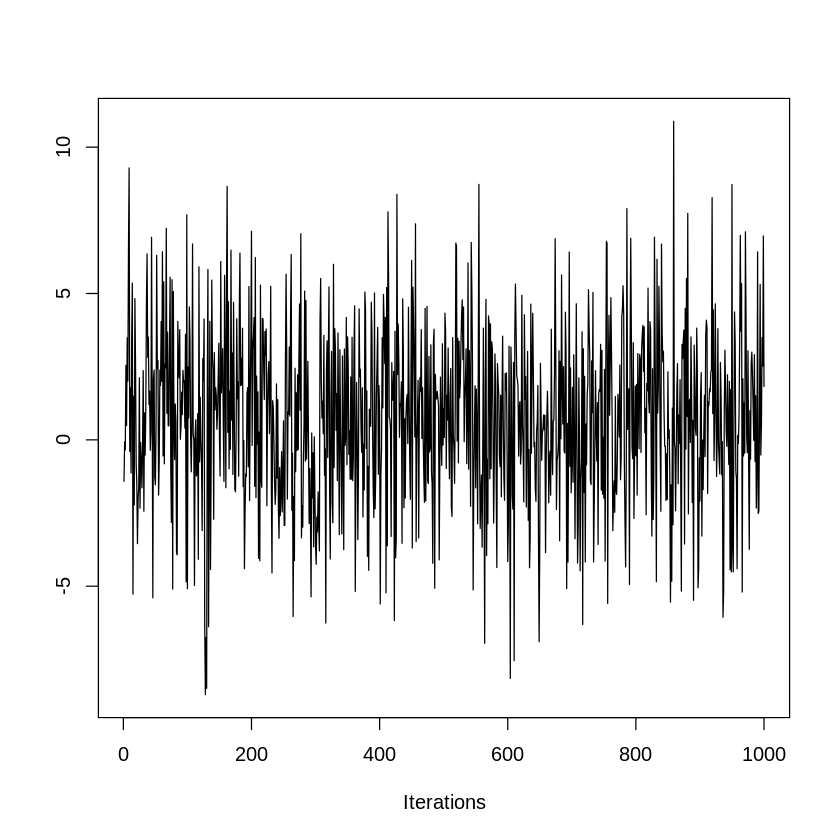

In [30]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=3.0)
str(post)
traceplot(as.mcmc(post$mu))

List of 2
 $ mu   : num [1:1000] 0.0264 0.0511 0.0616 0.0994 0.0681 ...
 $ accpt: num 0.948


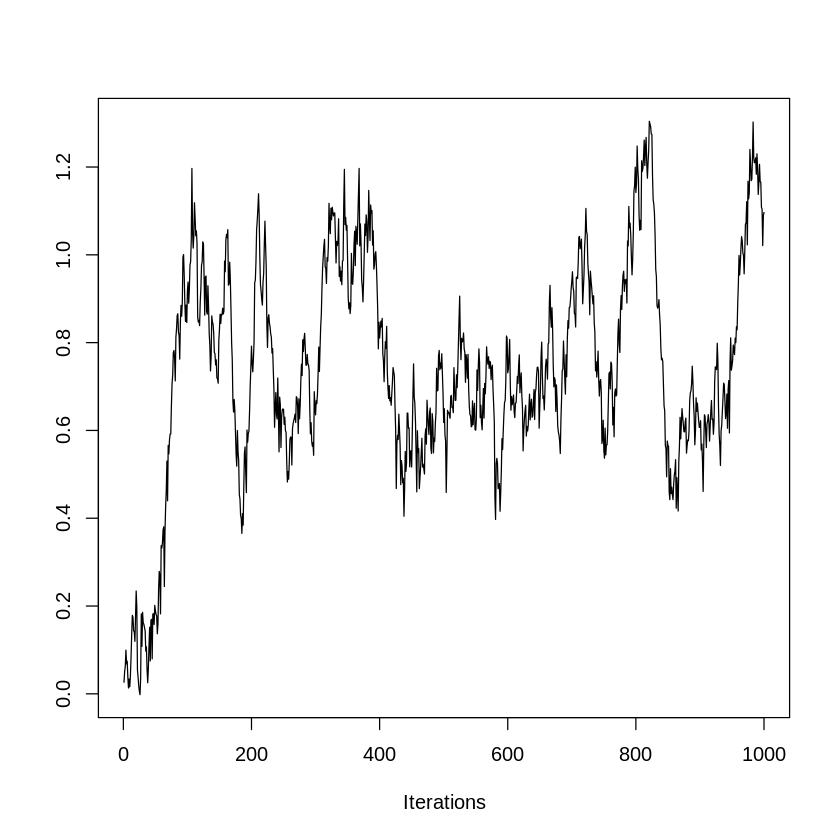

In [31]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=0.05)
str(post)
traceplot(as.mcmc(post$mu))

List of 2
 $ mu   : num [1:1000] -0.364 -0.932 0.694 0.628 0.803 ...
 $ accpt: num 0.371


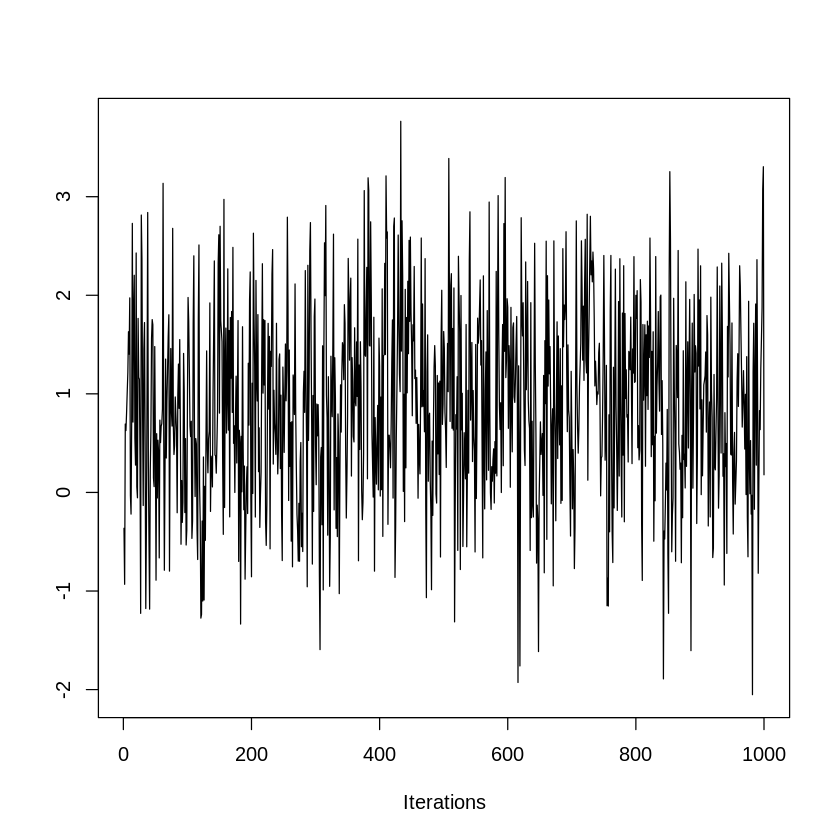

In [32]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=0.0, cand_sd=0.9)
str(post)
traceplot(as.mcmc(post$mu))

[1] 0.392

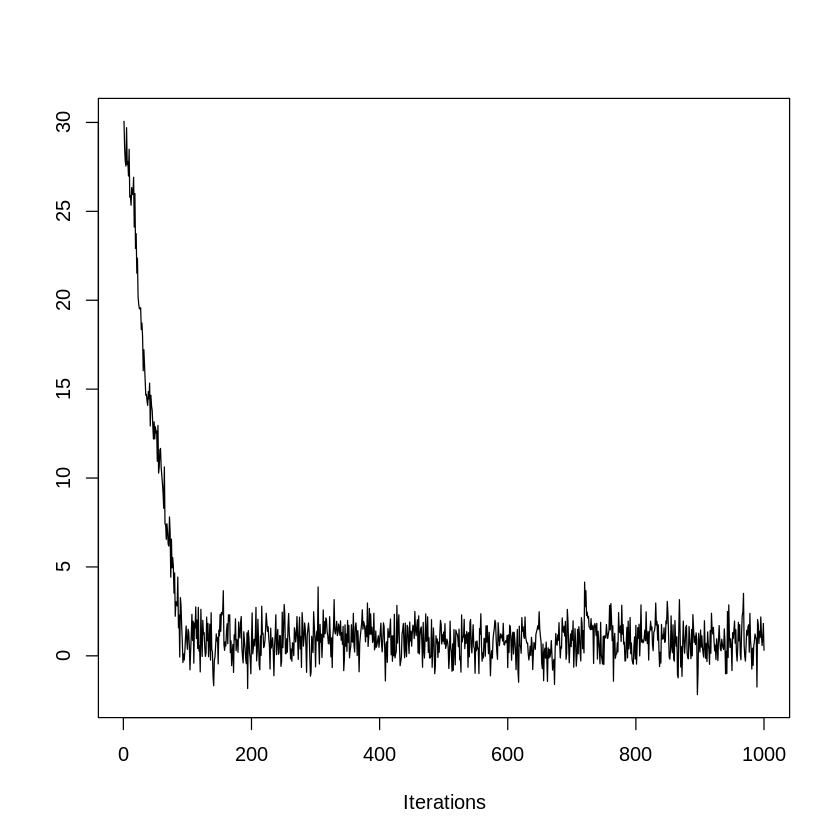

In [34]:
post = mh(n=n, ybar=ybar, n_iter=1e3, mu_init=30.0, cand_sd=0.9)
post$accpt
traceplot(as.mcmc(post$mu))

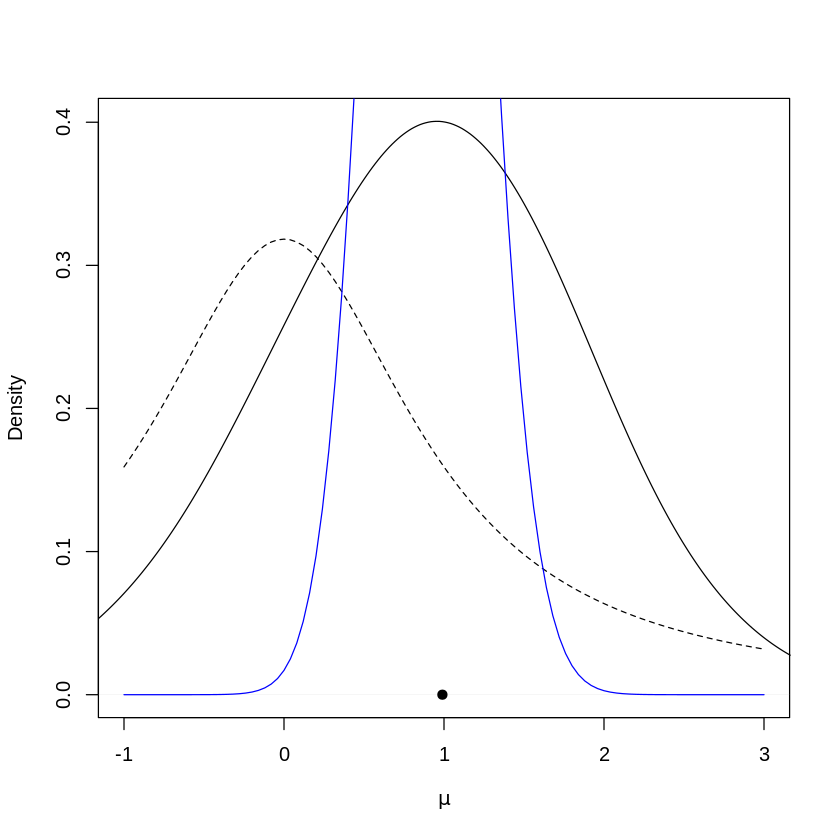

In [36]:
post$mu_keep = post$mu[-c(1:200)] # discard the first 200 samples
plot(density(post$mu_keep, adjust=2.0), main="", xlim=c(-1.0, 3.0), xlab=expression(mu)) # plot density estimate of the posterior
curve(dt(x=x, df=1), lty=2, add=TRUE) # prior for mu
points(ybar, 0, pch=19) # sample mean

curve(0.017*exp(lg(mu=x, n=n, ybar=ybar)), from=-1.0, to=3.0, add=TRUE, col="blue") # approximation to the true posterior in blue